In [1]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
fontsize = 16

rcParams['font.size'] = fontsize
rcParams['xtick.color'] = "#333333"
rcParams['xtick.labelsize'] = fontsize - 2

rcParams['ytick.color'] = "#333333"
rcParams['ytick.labelsize'] = fontsize - 2

In [3]:
DATA_PATH = '/home/vladimir/Documents/Science/DonSTU/1_plots/'

In [6]:
morphometry = pd.read_csv(f'{DATA_PATH}Morphometry.csv', sep=';', decimal=',')
print(morphometry.shape)
morphometry.head(3)

(20, 3)


,Day,Smooth muscle/colnnective tissue ratio,Mean Gray Value
0,Initial,0.900,1426
1,Initial,0.895,1709
2,Initial,0.920,1837


In [7]:
testosterone = pd.read_csv(f'{DATA_PATH}Testosterone.csv', sep=';', decimal=',')
print(testosterone.shape)
testosterone.head(3)

(20, 5)


,Unnamed: 0,Intial (nmol/l),Day_7 (nmol/l),Day_14 (nmol/l),Day_21 (nmol/l)
0,Rabbit_1,8.83,0.15,0.15,0.15
1,Rabbit_2,9.13,0.15,0.20,0.15
2,Rabbit_3,7.14,1.25,0.30,0.20


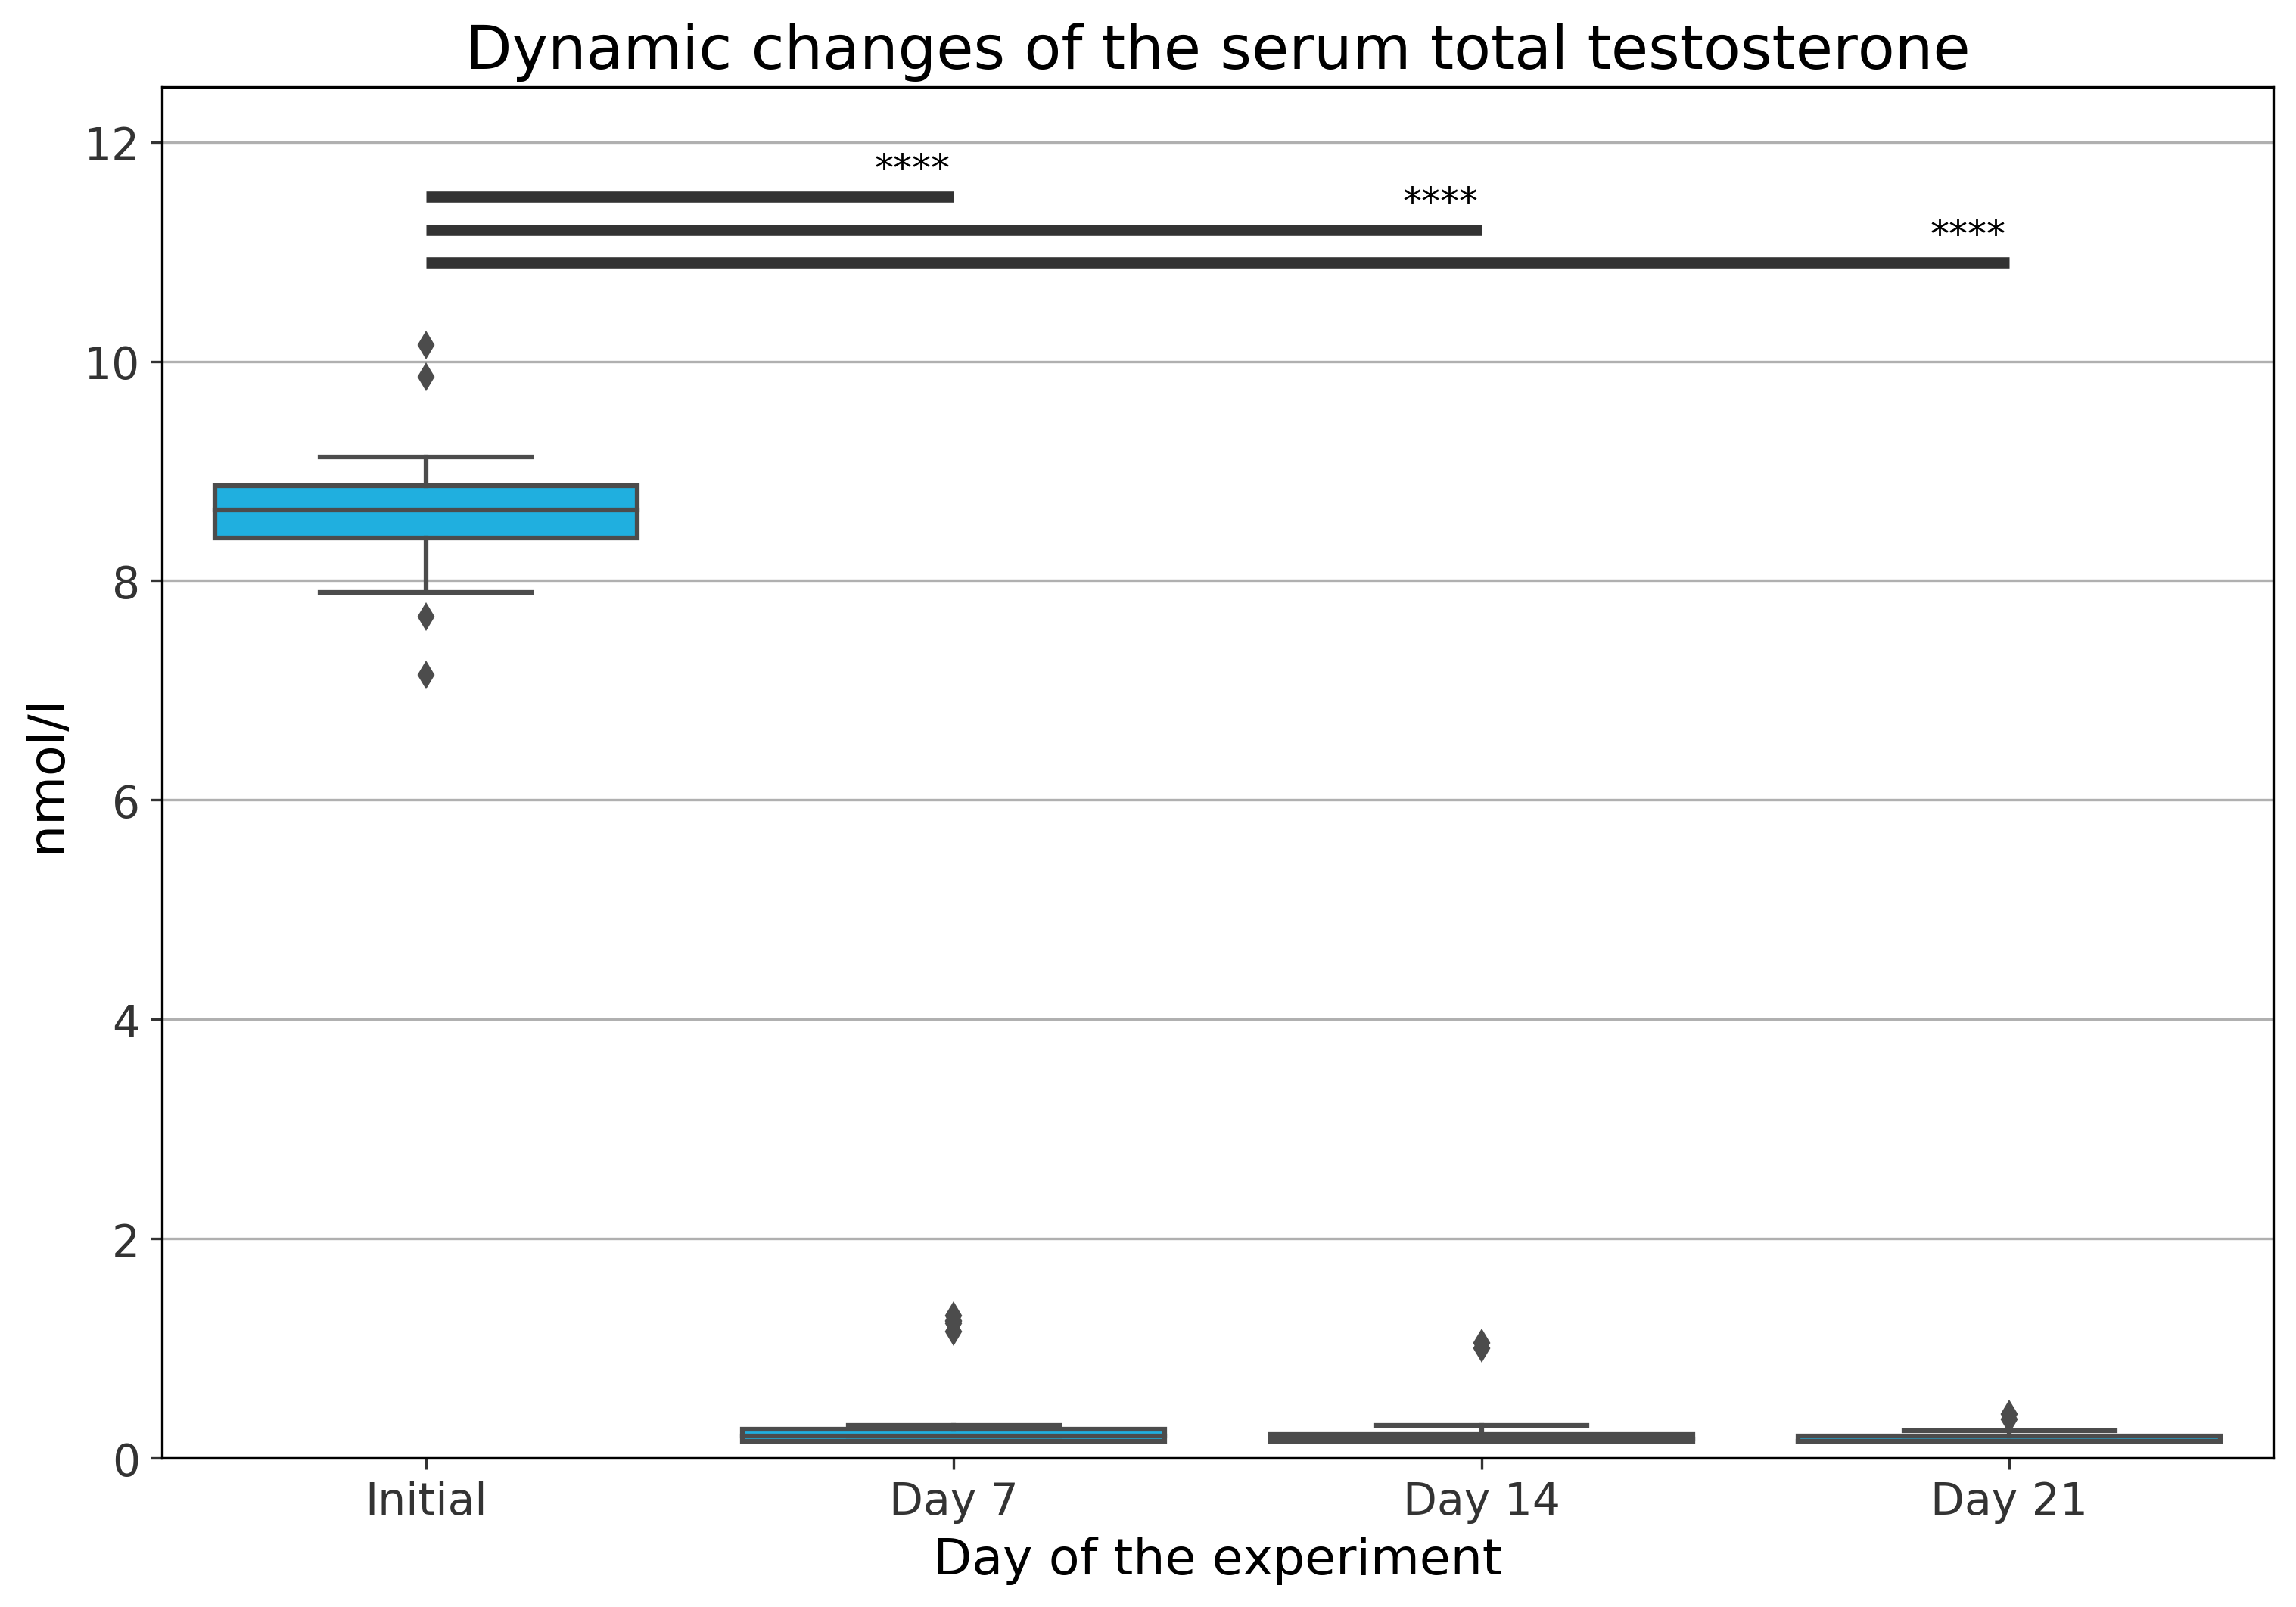

In [9]:
pal = {day: 'deepskyblue' for day in testosterone.columns[1:]}

plt.figure(figsize=(12, 8), dpi=300)

plt.grid()
sns.boxplot(
    x='variable',
    y='value',
    data=testosterone.drop('Unnamed: 0', axis='columns').melt(), 
    palette=pal,
)

ticks, labels = plt.xticks()


days_labels = ['Initial', 'Day 7', 'Day 14', 'Day 21']
plt.xticks(ticks=ticks, labels=days_labels)
plt.xlabel('Day of the experiment')
plt.ylabel('nmol/l')

plt.hlines(y=11.5, xmin=0, xmax=1, linewidth=3.5, colors='#333333')
plt.hlines(y=11.2, xmin=0, xmax=2, linewidth=3.5, colors='#333333')
plt.hlines(y=10.9, xmin=0, xmax=3, linewidth=3.5, colors='#333333')

plt.text(x=1-0.15, y=11.65, s='****', fontsize=12)
plt.text(x=2-0.15, y=11.35, s='****', fontsize=12)
plt.text(x=3-0.15, y=11.05, s='****', fontsize=12)

plt.ylim(0, 12.5)

plt.title('Dynamic changes of the serum total testosterone')

plt.savefig(f'{DATA_PATH}plots/ST_dynamics.svg')

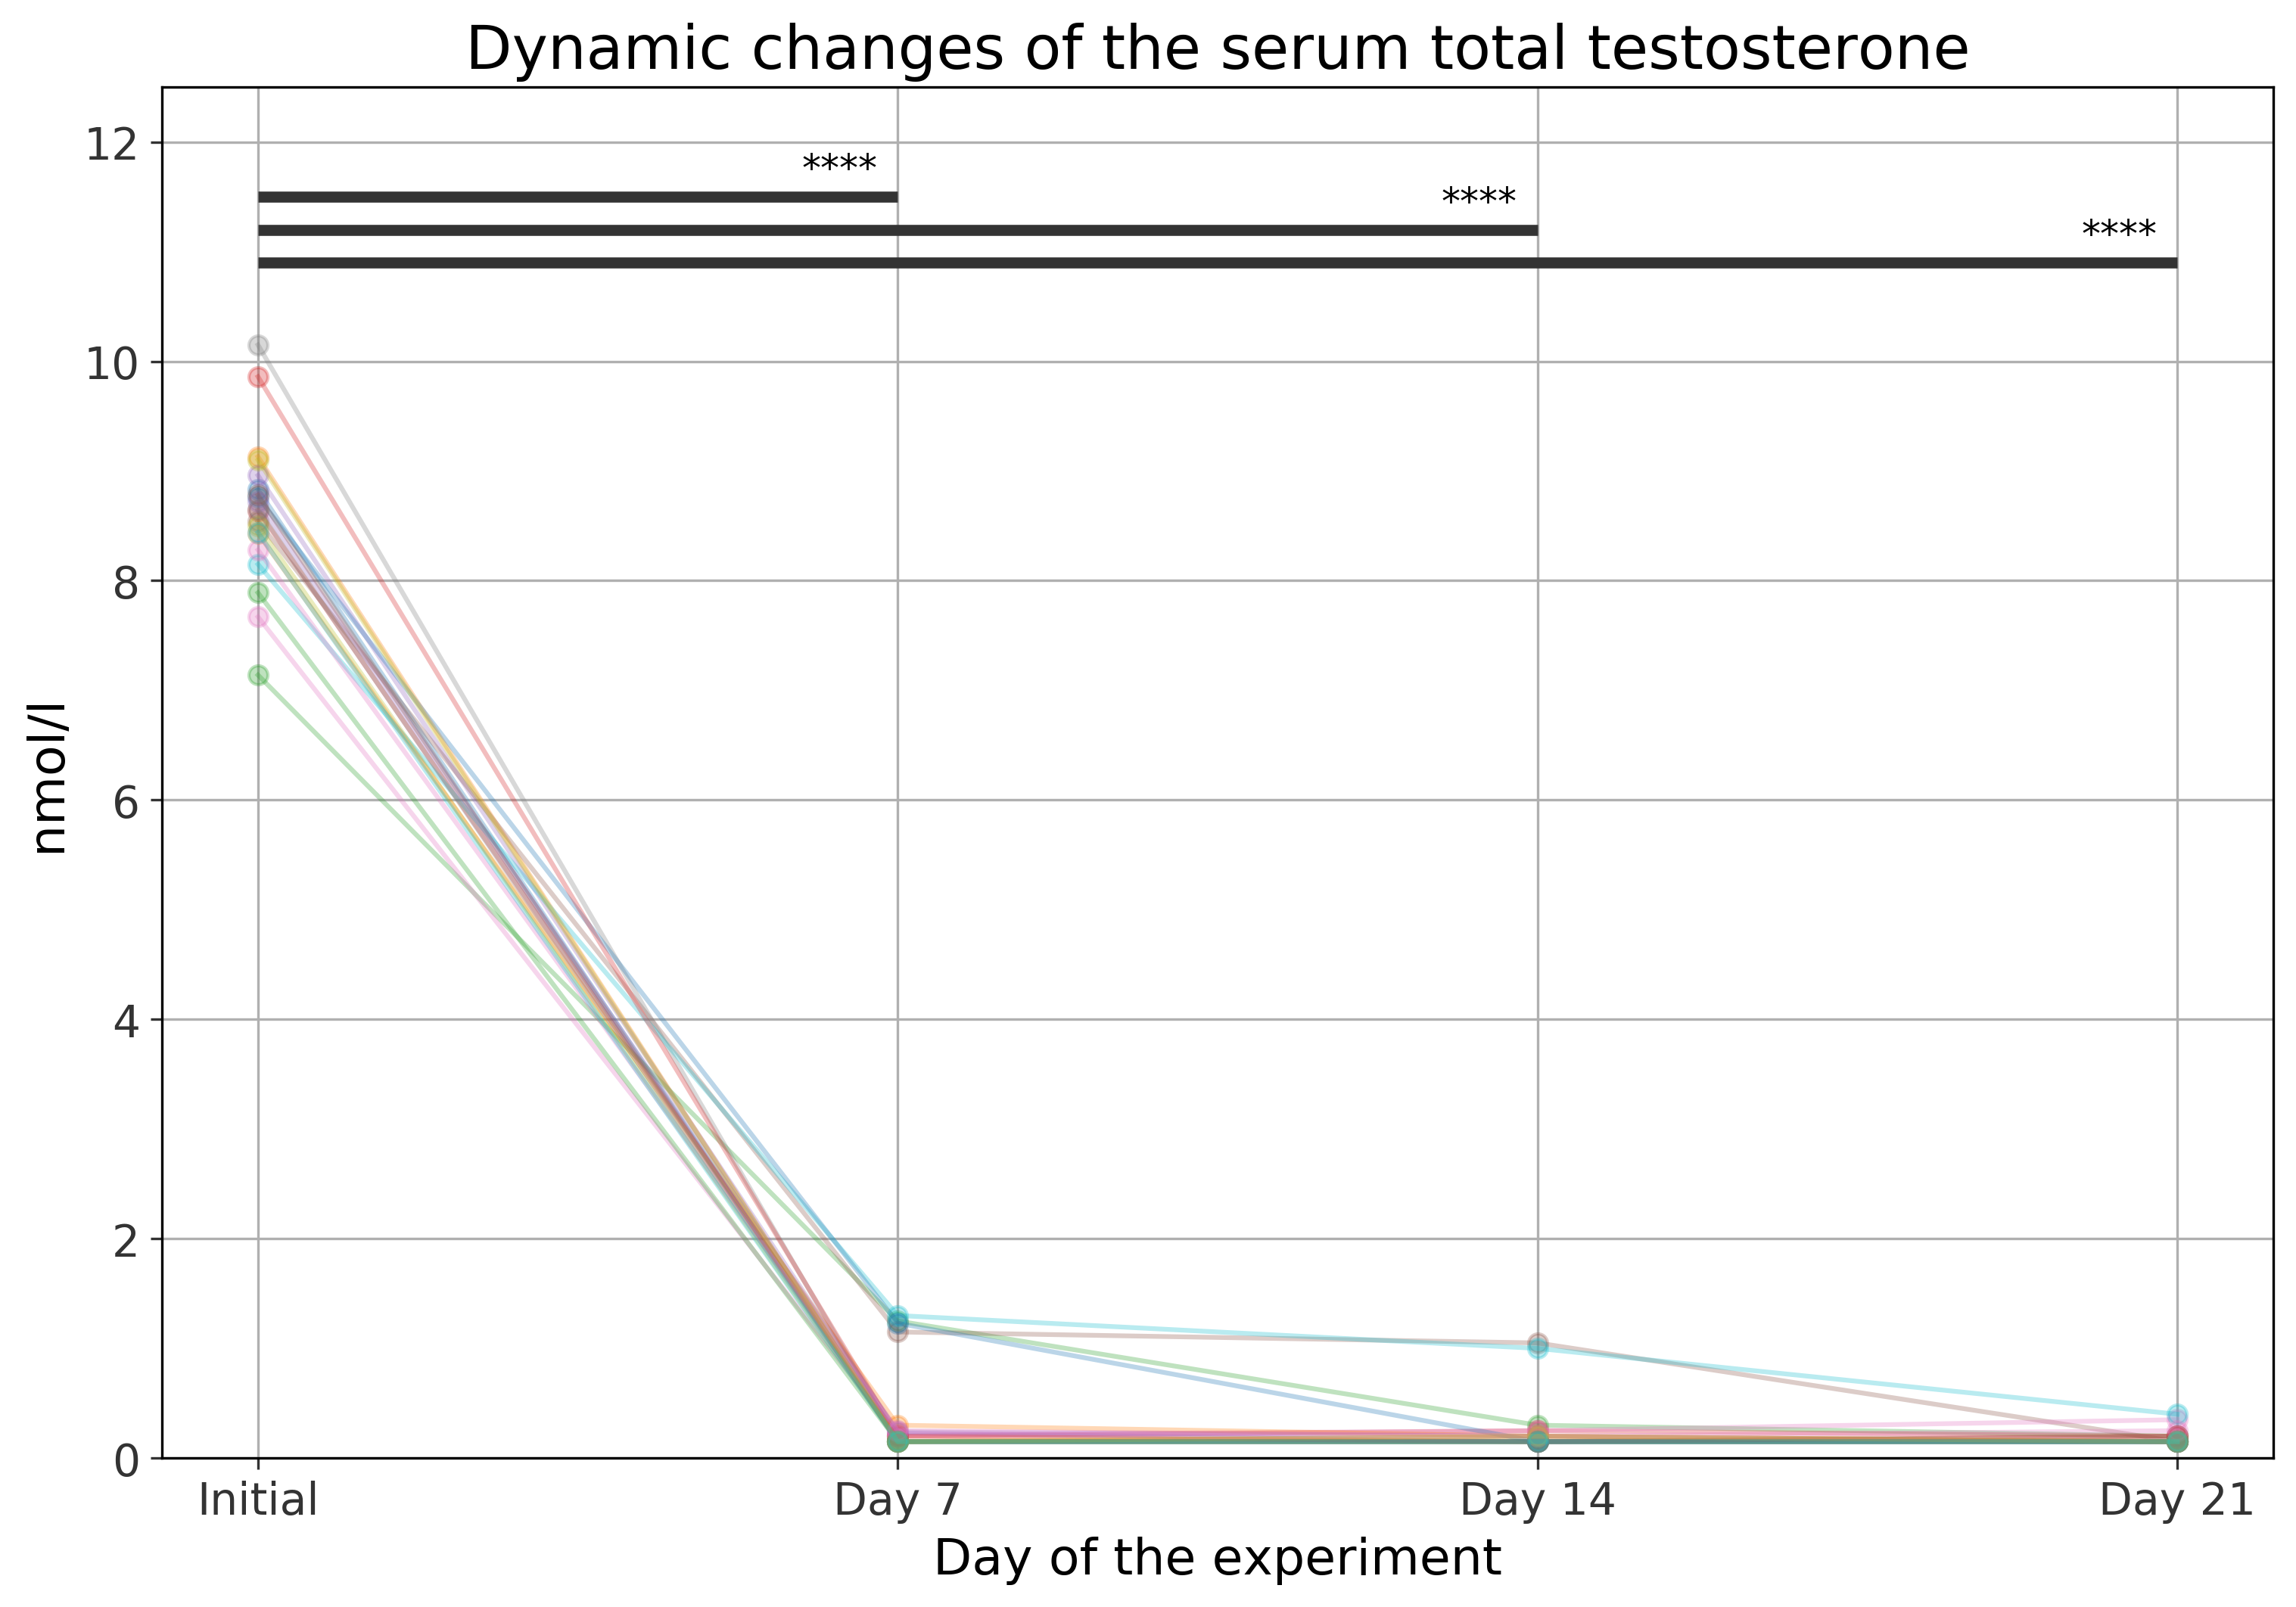

In [10]:
x = [0, 1, 2, 3]

plt.figure(figsize=(12, 8), dpi=300)
plt.grid()

for _, row in testosterone[testosterone.columns[1:]].iterrows():
    plt.plot(x, row, '-o', alpha=.3)
    
plt.xticks(ticks=x, labels=days_labels)
plt.xlabel('Day of the experiment')
plt.ylabel('nmol/l')

plt.hlines(y=11.5, xmin=0, xmax=1, linewidth=3.5, colors='#333333')
plt.hlines(y=11.2, xmin=0, xmax=2, linewidth=3.5, colors='#333333')
plt.hlines(y=10.9, xmin=0, xmax=3, linewidth=3.5, colors='#333333')

plt.text(x=1-0.15, y=11.65, s='****', fontsize=12)
plt.text(x=2-0.15, y=11.35, s='****', fontsize=12)
plt.text(x=3-0.15, y=11.05, s='****', fontsize=12)

plt.ylim(0, 12.5)

plt.title('Dynamic changes of the serum total testosterone')

plt.savefig(f'{DATA_PATH}plots/ST_dynamics_lines.svg')

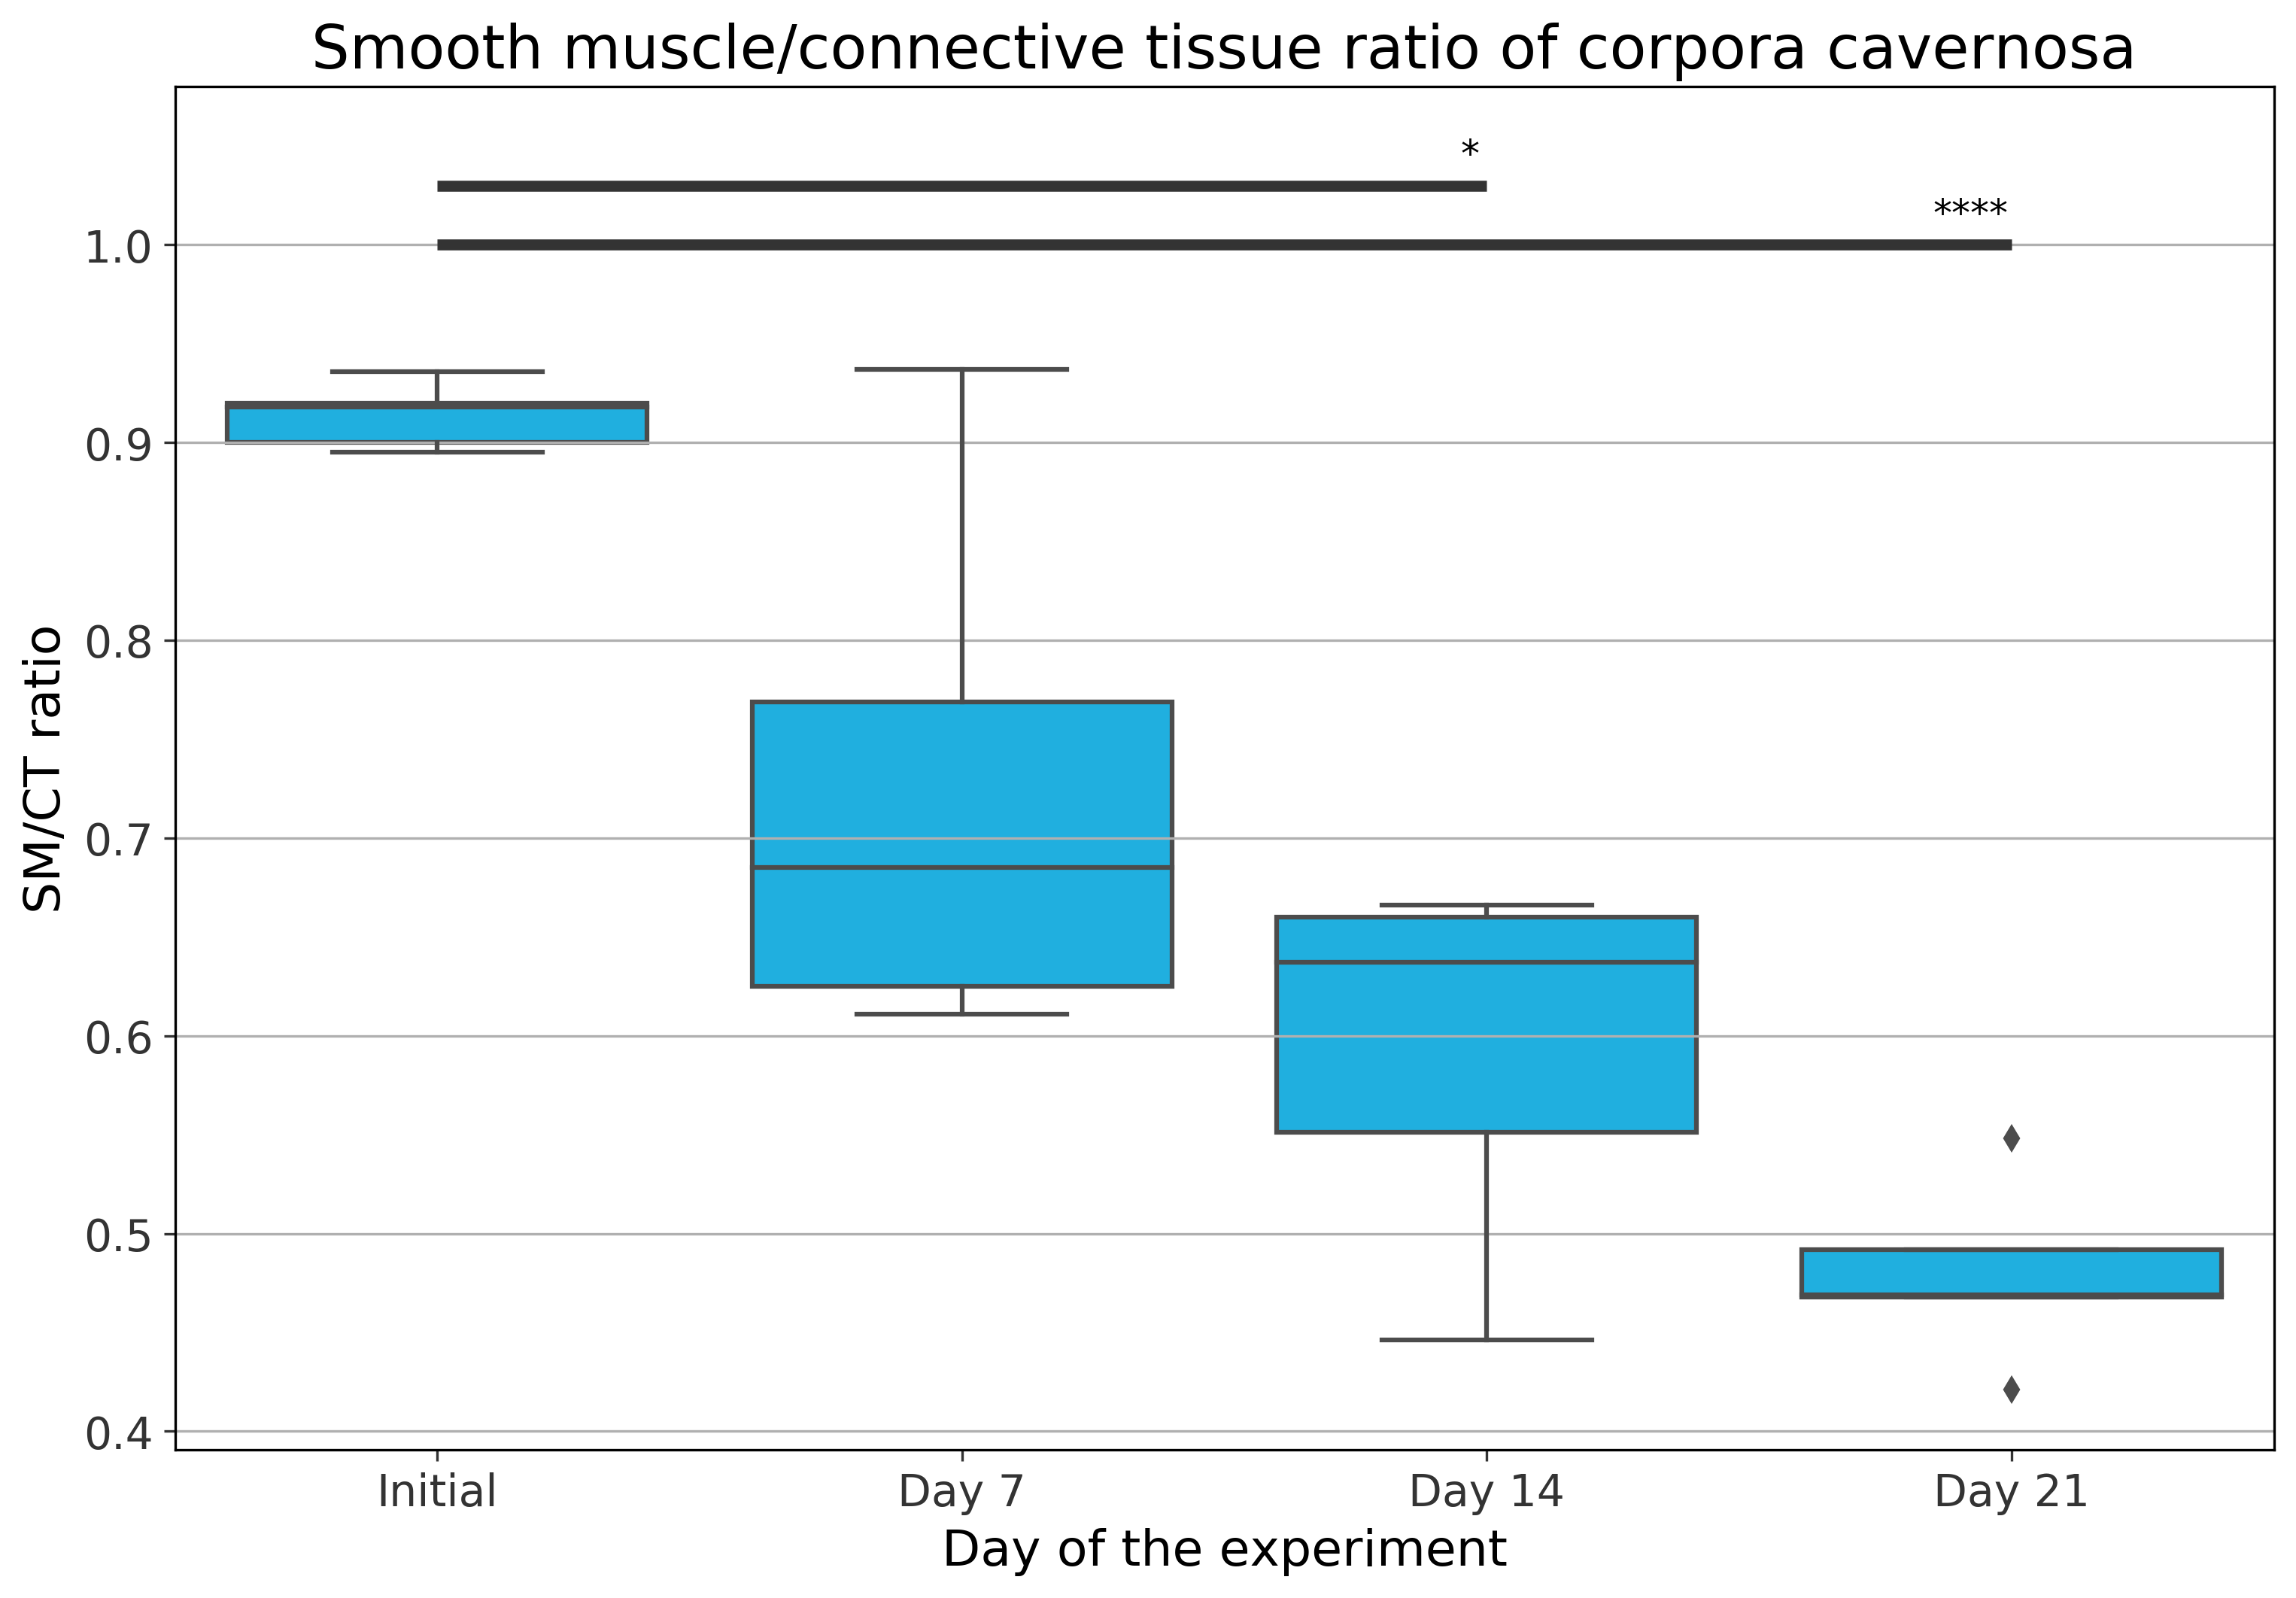

In [11]:
pal = {day: 'deepskyblue' for day in morphometry['Day'].unique()}

plt.figure(figsize=(12, 8), dpi=300)
plt.grid()

sns.boxplot(x='Day', y='Smooth muscle/colnnective tissue ratio', data=morphometry, palette=pal)

plt.xticks(ticks=x, labels=days_labels)

plt.xlabel('Day of the experiment')
plt.ylabel('SM/CT ratio')

plt.hlines(y=1.03, xmin=0, xmax=2, linewidth=3.5, colors='#333333')
plt.hlines(y=1, xmin=0, xmax=3, linewidth=3.5, colors='#333333')

plt.text(x=2-0.05, y=1.04, s='*', fontsize=12)
plt.text(x=3-0.15, y=1.01, s='****', fontsize=12)

plt.ylim(top=1.08)

plt.title('Smooth muscle/connective tissue ratio of corpora cavernosa')

plt.savefig(f'{DATA_PATH}plots/SMCT_ratio.svg')

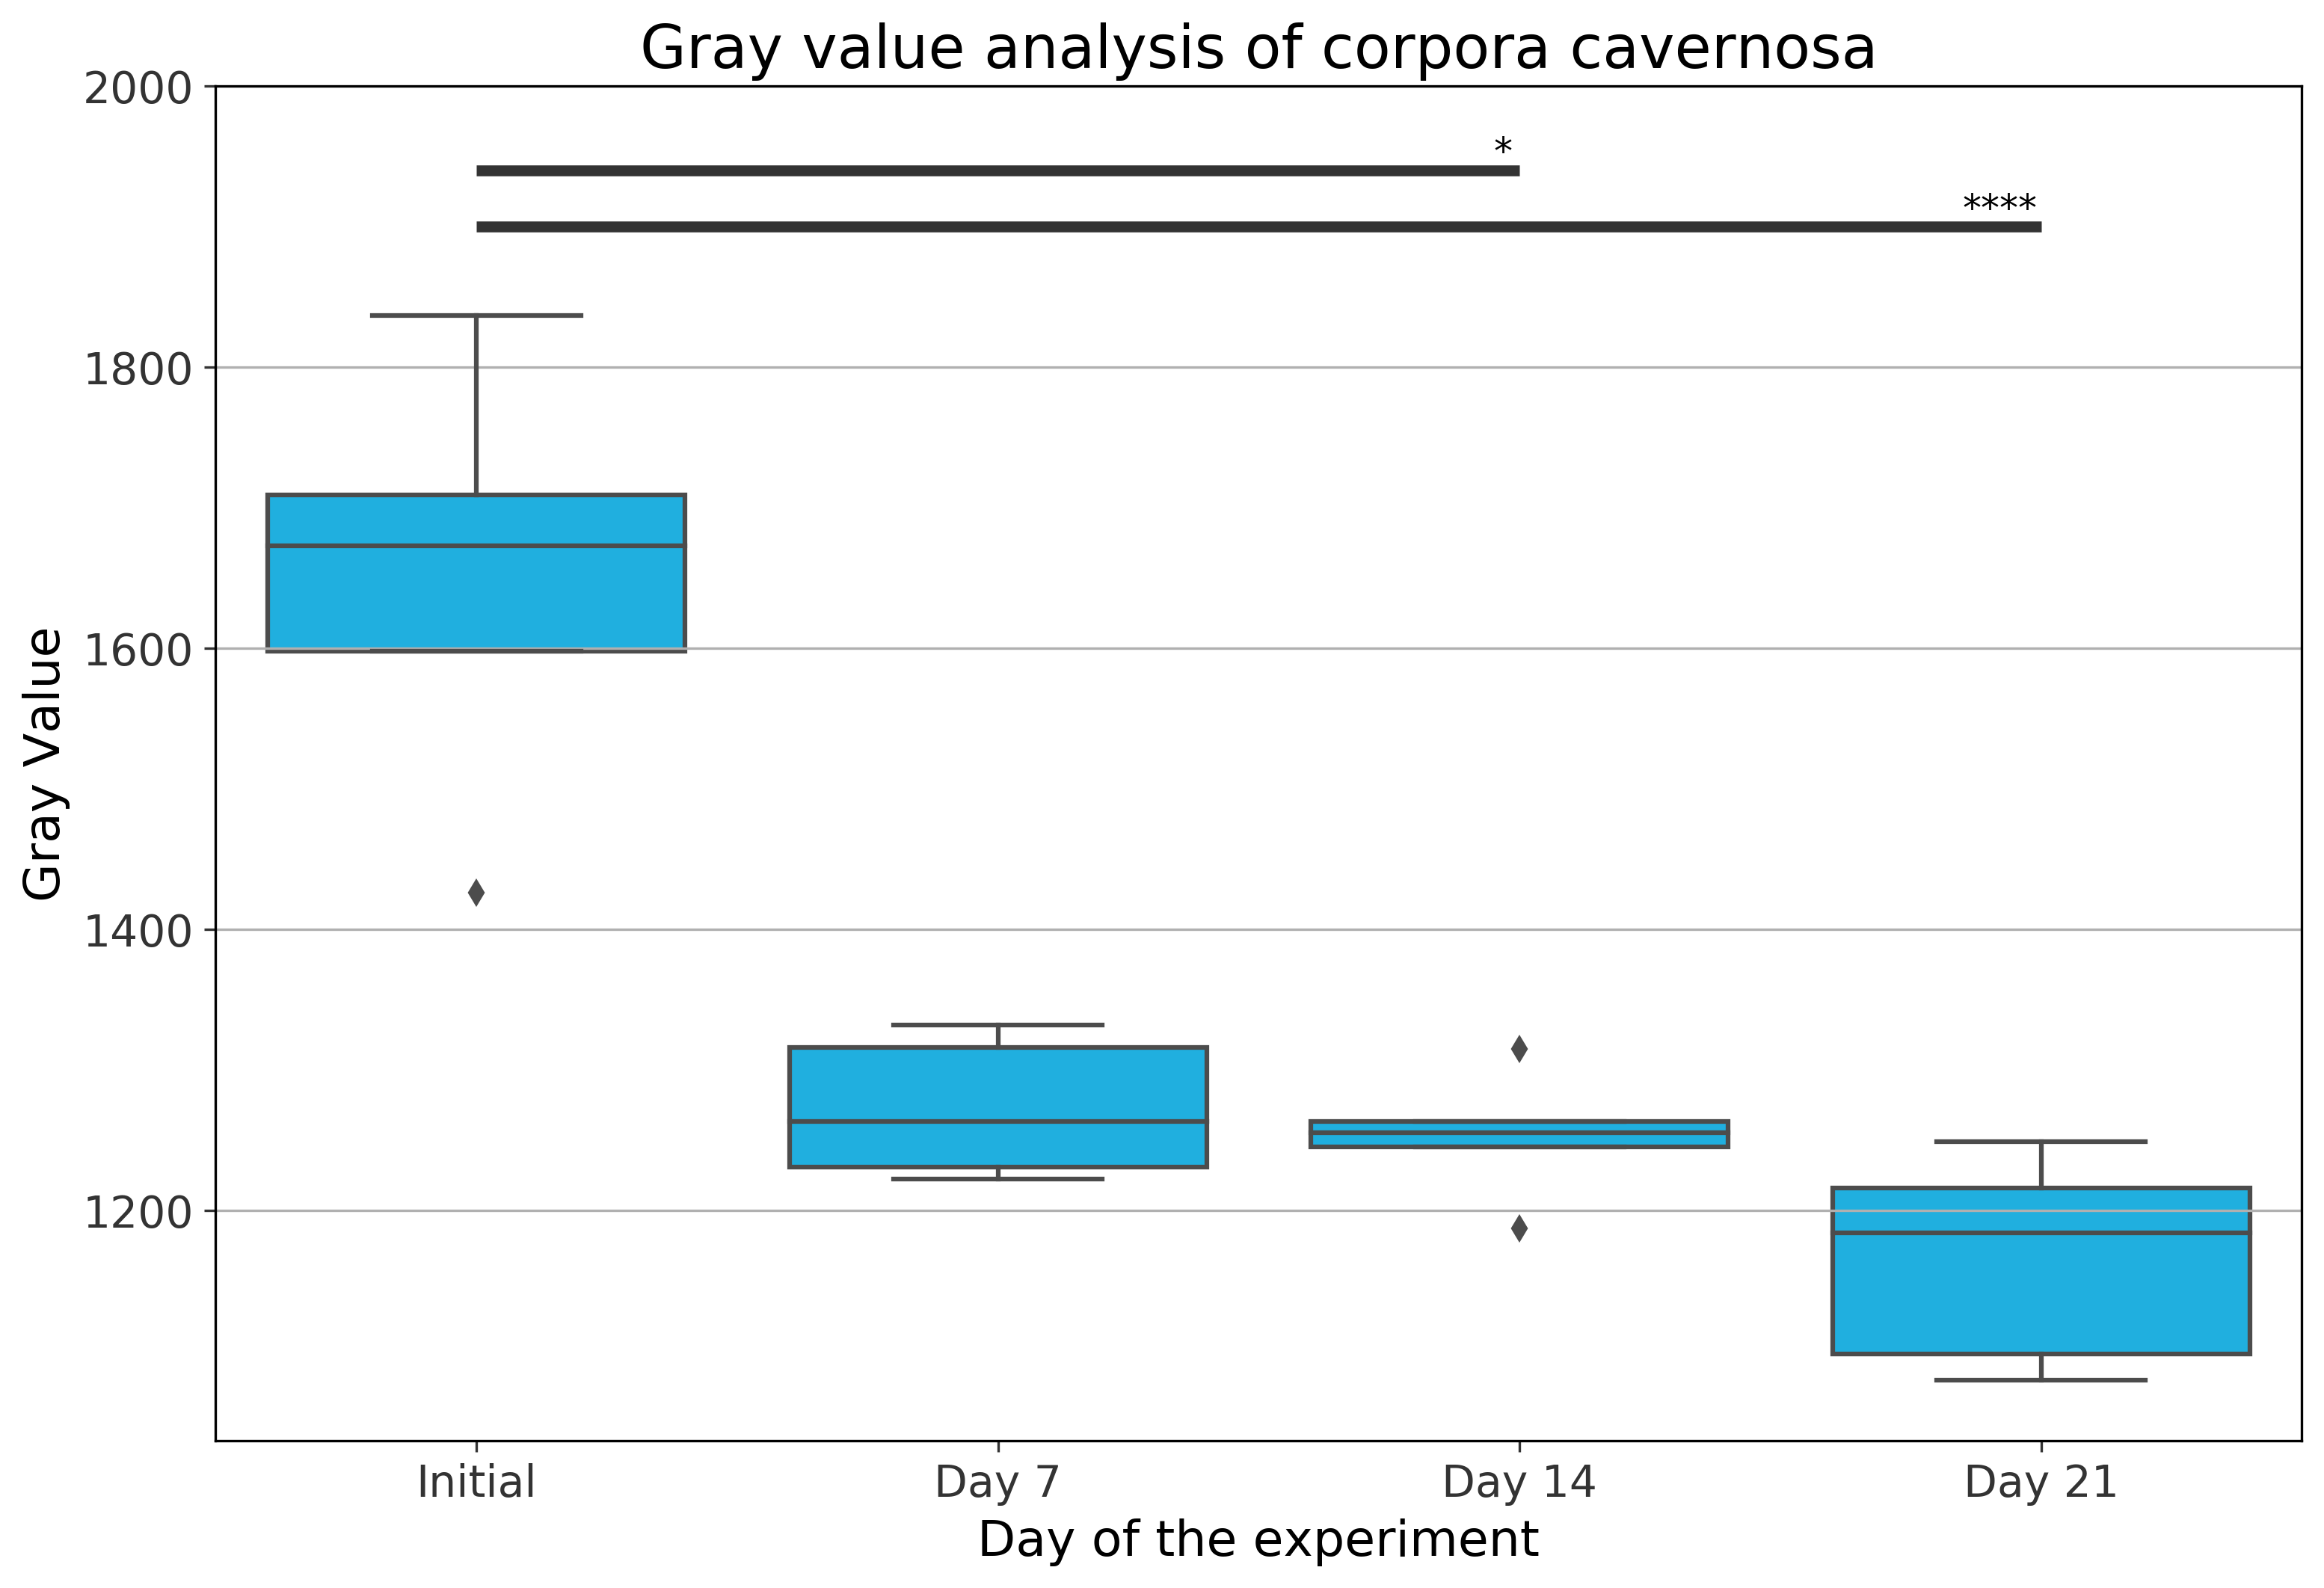

In [12]:
plt.figure(figsize=(12, 8), dpi=300)
plt.grid()

sns.boxplot(x='Day', y='Mean Gray Value', data=morphometry, palette=pal)

plt.xticks(ticks=x, labels=days_labels)

plt.xlabel('Day of the experiment')
plt.ylabel('Gray Value')

plt.hlines(y=1940, xmin=0, xmax=2, linewidth=3.5, colors='#333333')
plt.hlines(y=1900, xmin=0, xmax=3, linewidth=3.5, colors='#333333')

plt.text(x=2-0.05, y=1945, s='*', fontsize=12)
plt.text(x=3-0.15, y=1905, s='****', fontsize=12)

plt.ylim(top=2000)

plt.title('Gray value analysis of corpora cavernosa');

plt.savefig(f'{DATA_PATH}plots/Gray_value.svg')

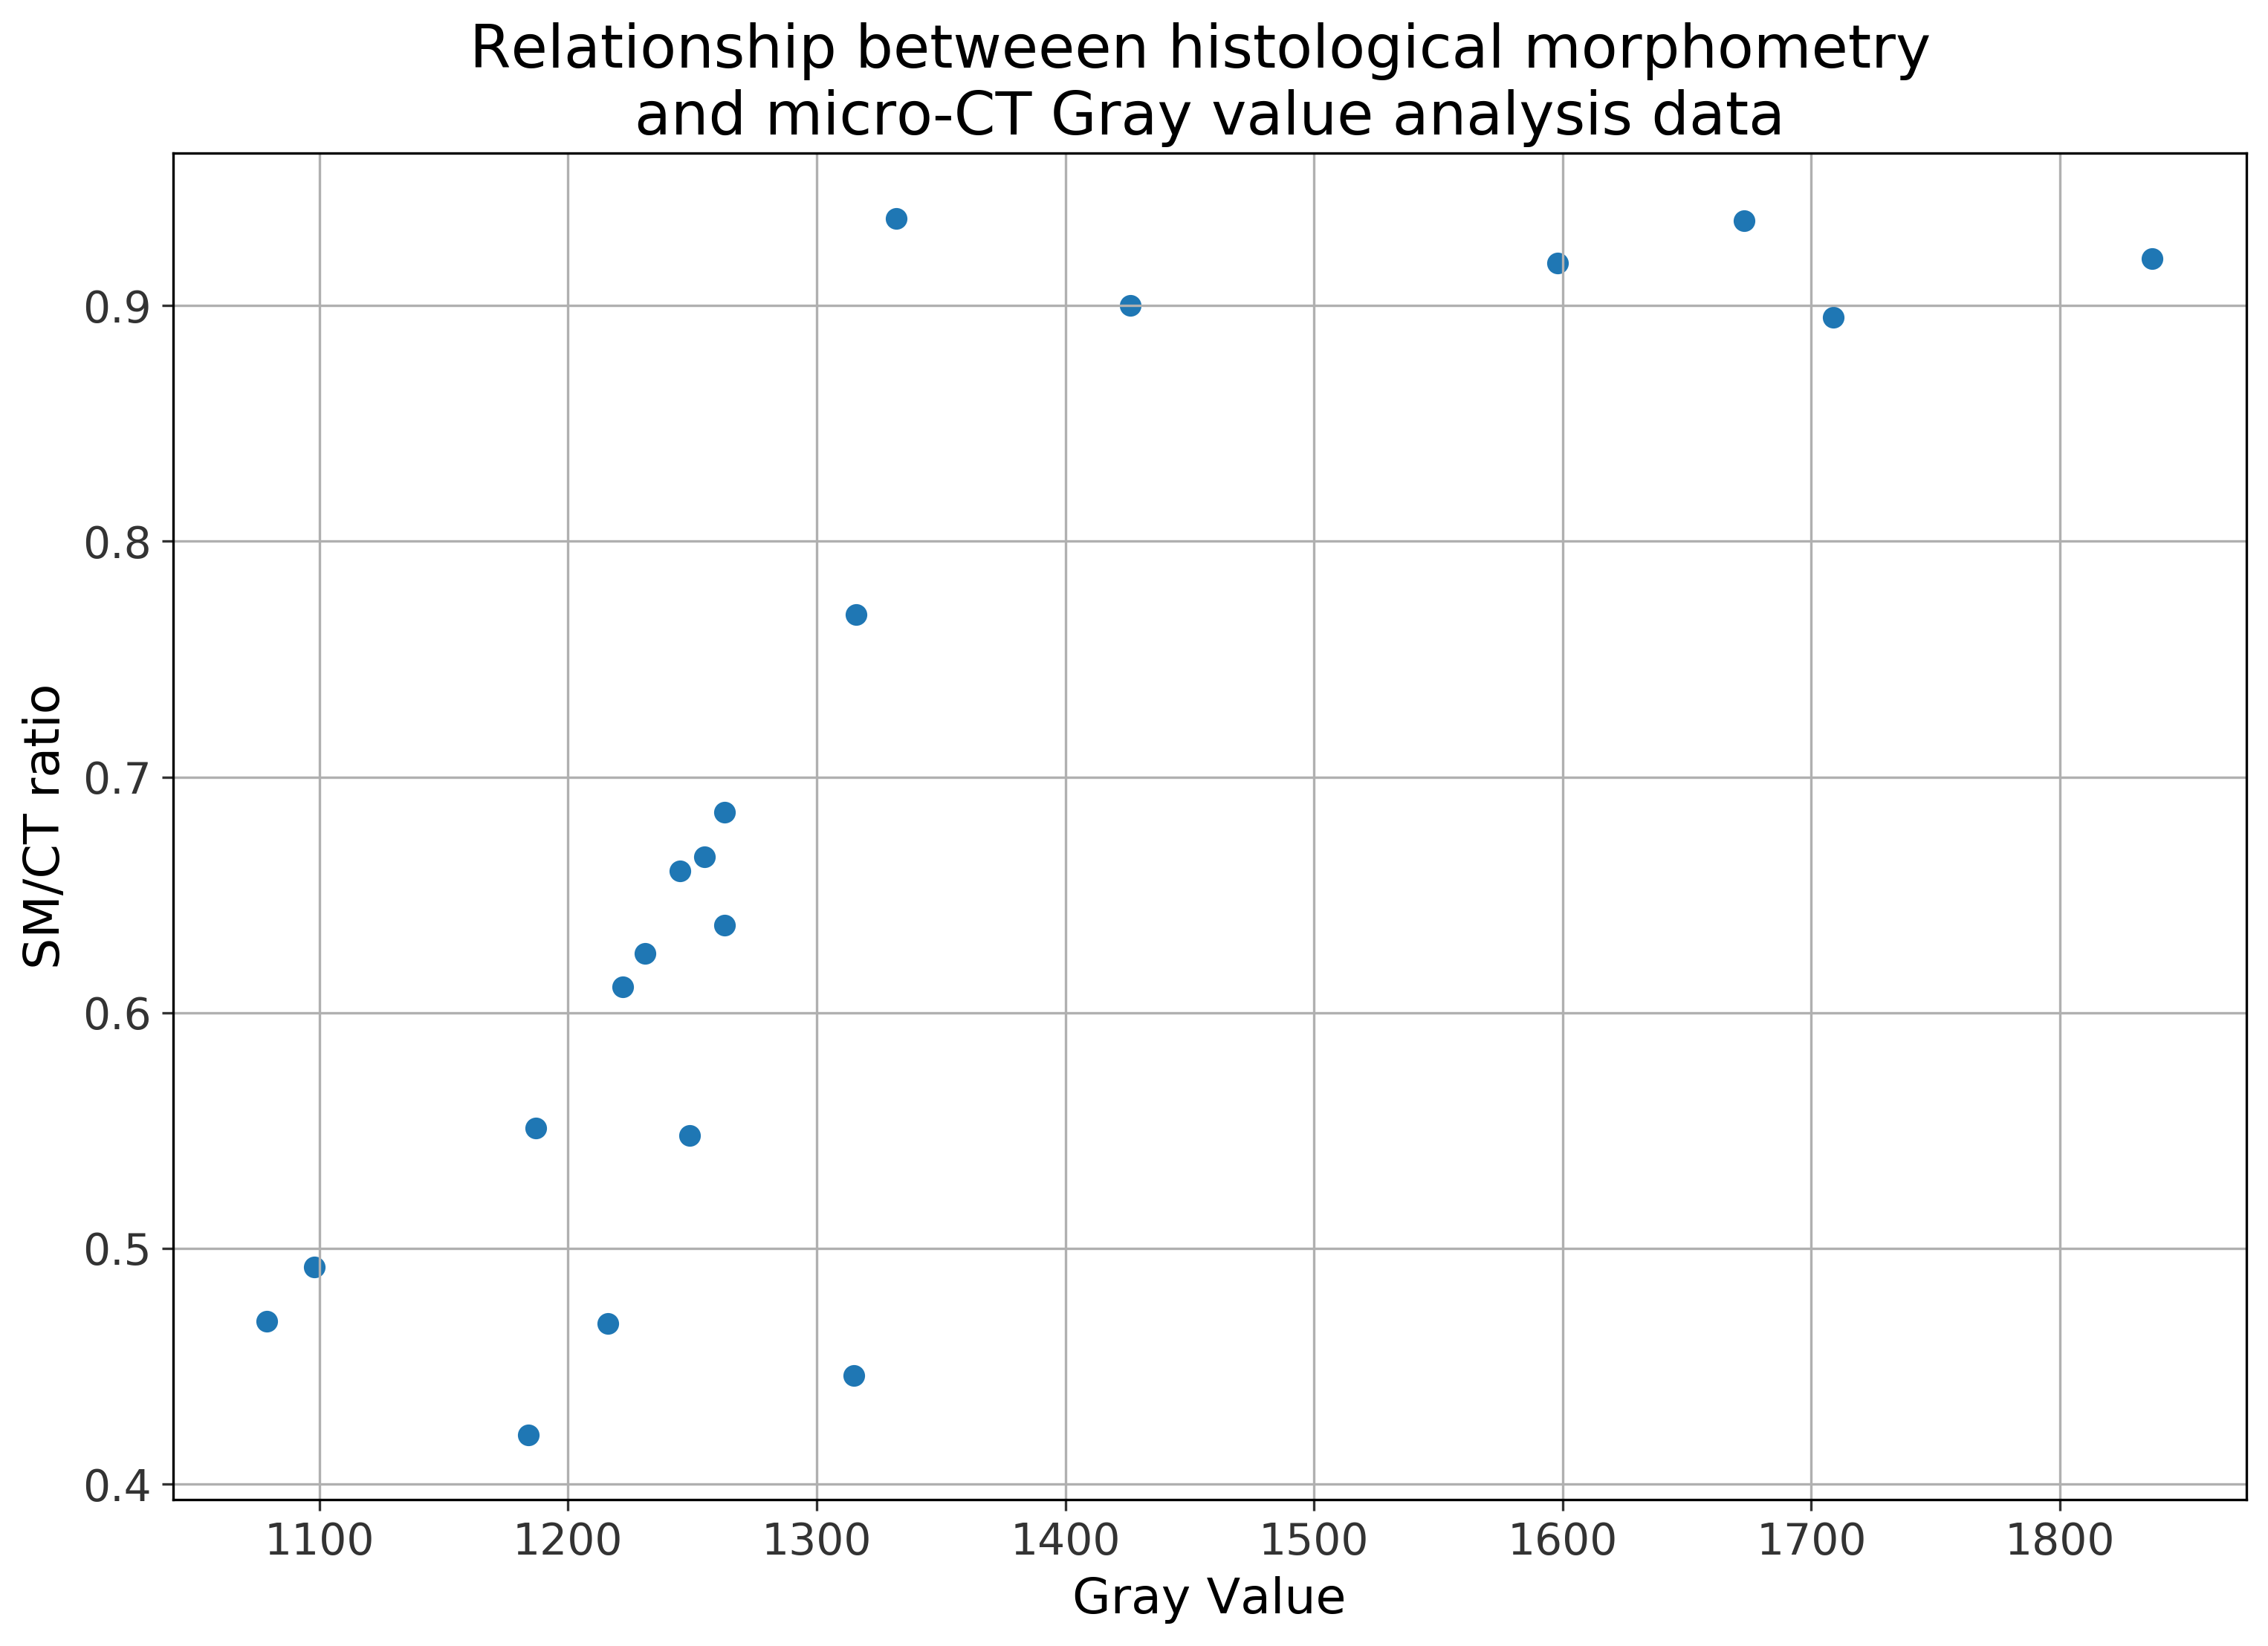

In [30]:
plt.figure(figsize=(12, 8), dpi=300)
plt.grid()


plt.scatter(x='Mean Gray Value', y='Smooth muscle/colnnective tissue ratio', data=morphometry)

plt.xlabel('Gray Value')
plt.ylabel('SM/CT ratio')

plt.title('Relationship betweeen histological morphometry \nand micro-CT Gray value analysis data')

plt.savefig(f'{DATA_PATH}plots/Gray_value_against_SMCT_scatterplot.svg')